In [ ]:
# https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#describe categerocial data
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
data['Name'][2]

'Heikkinen, Miss. Laina'

# Big-Data & FinTech: Stock Market in Python

This machine learning project is about clustering similar companies with K-means clustering algorithm for trading purposes. The similarity is based on daily stock movements.
The necessary packages are imported.


In [ ]:
#Install Package
!pip install yfinance
!pip install yahoofinancials
import yfinance as yf
from yahoofinancials import YahooFinancials
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go

A dictionary ‘companies_dict’ is defined where ‘key’ is company’s name and ‘value’ is company’s stock code. 28 companies are considered, 3 are not listed currently.

In [ ]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Sony':'SONY',  # Updated
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC',
    'Gen Digital':'GEN'  # Updated ticker
}


## IMPORT THE DATA

Stock market data is extracted from yahoo finance. The time period considered is from ‘2021–01–01’ to today. The stock movement of companies would be compared based on these 6 parameters :- ‘High’, ‘Low’, ‘Open’, ‘Close’,

* ‘Volume’, ‘Adj Close’.
* ‘High’ :- Highest price during the day.
* ‘Low’ :- Lowest price during the day.
* ‘Open’ :- Opening price of the day.
* ‘Close’ :- Closing price of the day.
* ‘Volume’ :- Total number of shares of stock traded during the day.
* ‘Adj Close’ :- The closing price is amended to account for any corporate actions to give the ‘Adjusted closing’ price.


In [ ]:
from datetime import datetime
# Define a start date and End Date
start = '2021-01-01'
#setting today date as End Date
end = datetime.today().strftime('%Y-%m-%d')
data_source ='yahoo' # Source of data is yahoo finance.
p =  yf.download(list(companies_dict.values()), start, end)


[*********************100%***********************]  26 of 26 completed


In [ ]:
print(datetime.today().strftime('%Y-%m-%d'))

2024-10-16


In [ ]:
p # p is the dataframe

Price                       Adj Close                                      \
Ticker                           AAPL        AMZN         AXP          BA   
Date                                                                        
2021-01-04 00:00:00+00:00  126.683441  159.331497  112.164024  202.720001   
2021-01-05 00:00:00+00:00  128.249725  160.925507  112.762665  211.630005   
2021-01-06 00:00:00+00:00  123.932640  156.919006  116.934120  211.029999   
2021-01-07 00:00:00+00:00  128.161636  158.108002  116.009178  212.710007   
2021-01-08 00:00:00+00:00  129.267807  159.134995  116.123604  209.899994   
...                               ...         ...         ...         ...   
2024-10-09 00:00:00+00:00  229.539993  185.169998  271.420013  149.369995   
2024-10-10 00:00:00+00:00  229.039993  186.649994  270.470001  146.619995   
2024-10-11 00:00:00+00:00  227.550003  188.820007  276.160004  151.020004   
2024-10-14 00:00:00+00:00  231.300003  187.539993  276.519989  148.990005   
2024-10-15 00:00:00+00:00  233.850006  187.690002  277.309998  152.350006   

Price                                                                    \
Ticker                           BAC         CVX          F          GE   
Date                                                                      
2021-01-04 00:00:00+00:00  27.381517   72.398872   7.037917   51.385963   
2021-01-05 00:00:00+00:00  27.591232   74.356033   7.145300   52.858345   
2021-01-06 00:00:00+00:00  29.314547   76.749115   7.302251   55.754009   
2021-01-07 00:00:00+00:00  29.961927   77.108086   7.483981   55.312302   
2021-01-08 00:00:00+00:00  29.661026   77.843094   7.434418   55.655853   
...                              ...         ...        ...         ...   
2024-10-09 00:00:00+00:00  40.189999  149.649994  10.620000  189.279999   
2024-10-10 00:00:00+00:00  39.970001  150.619995  10.680000  188.119995   
2024-10-11 00:00:00+00:00  41.950001  151.419998  10.720000  191.160004   
2024-10-14 00:00:00+00:00  41.910000  151.779999  10.920000  192.630005   
2024-10-15 00:00:00+00:00  42.139999  147.729996  10.840000  190.570007   

Price                                            ...   Volume            \
Ticker                           GEN        HMC  ...      MCD      MSFT   
Date                                             ...                      
2021-01-04 00:00:00+00:00  19.126043  25.206482  ...  4055400  37130100   
2021-01-05 00:00:00+00:00  19.310213  25.061201  ...  2576100  23823000   
2021-01-06 00:00:00+00:00  19.264166  25.642328  ...  3083400  35930700   
2021-01-07 00:00:00+00:00  19.448345  25.578770  ...  3142000  27694500   
2021-01-08 00:00:00+00:00  19.374674  25.587847  ...  2639100  22956200   
...                              ...        ...  ...      ...       ...   
2024-10-09 00:00:00+00:00  27.590000  31.450001  ...  1854100  14974300   
2024-10-10 00:00:00+00:00  27.700001  31.820000  ...  1739500  13848400   
2024-10-11 00:00:00+00:00  27.750000  31.690001  ...  1775600  14144900   
2024-10-14 00:00:00+00:00  28.010000  31.879999  ...  2376300  16653100   
2024-10-15 00:00:00+00:00  28.110001  30.670000  ...  3066500  18885000   

Price                                                                  \
Ticker                         NOC      PEP     SONY      TM      TXN   
Date                                                                    
2021-01-04 00:00:00+00:00  1267500  7486900  5320000  315600  4659900   
2021-01-05 00:00:00+00:00   939900  4126000  5593500  231800  4734100   
2021-01-06 00:00:00+00:00   952500  4843300  4907500  296100  5254400   
2021-01-07 00:00:00+00:00  1331000  4473200  3803500  345000  5673600   
2021-01-08 00:00:00+00:00  2090300  4312000  7002000  418100  4556500   
...                            ...      ...      ...     ...      ...   
2024-10-09 00:00:00+00:00   428500  7177500  1987700  416300  3214900   
2024-10-10 00:00:00+00:00   372800  5292400  2079400  241400  3649400   
2024-10-11 00:00

In [ ]:
p.columns # printing the columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'AMZN'),
            ('Adj Close',  'AXP'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'BAC'),
            ('Adj Close',  'CVX'),
            ('Adj Close',    'F'),
            ('Adj Close',   'GE'),
            ('Adj Close',  'GEN'),
            ('Adj Close',  'HMC'),
            ...
            (   'Volume',  'MCD'),
            (   'Volume', 'MSFT'),
            (   'Volume',  'NOC'),
            (   'Volume',  'PEP'),
            (   'Volume', 'SONY'),
            (   'Volume',   'TM'),
            (   'Volume',  'TXN'),
            (   'Volume',  'VLO'),
            (   'Volume',  'WBA'),
            (   'Volume',  'XOM')],
           names=['Price', 'Ticker'], length=156)

In [ ]:
#print the column open in p - Transposed
p['Open'].T

Date,2021-01-04 00:00:00+00:00,2021-01-05 00:00:00+00:00,2021-01-06 00:00:00+00:00,2021-01-07 00:00:00+00:00,2021-01-08 00:00:00+00:00,2021-01-11 00:00:00+00:00,2021-01-12 00:00:00+00:00,2021-01-13 00:00:00+00:00,2021-01-14 00:00:00+00:00,2021-01-15 00:00:00+00:00,...,2024-10-02 00:00:00+00:00,2024-10-03 00:00:00+00:00,2024-10-04 00:00:00+00:00,2024-10-07 00:00:00+00:00,2024-10-08 00:00:00+00:00,2024-10-09 00:00:00+00:00,2024-10-10 00:00:00+00:00,2024-10-11 00:00:00+00:00,2024-10-14 00:00:00+00:00,2024-10-15 00:00:00+00:00
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,133.520004,128.889999,127.720001,128.360001,132.429993,129.190002,128.500000,128.759995,130.800003,128.779999,...,225.889999,225.139999,227.899994,224.500000,224.300003,225.229996,227.779999,229.300003,228.699997,233.610001
AMZN,163.500000,158.300507,157.324005,157.850006,159.000000,157.400497,156.000000,156.421997,158.376007,156.151001,...,184.440002,183.050003,185.750000,182.949997,181.919998,182.820007,187.130005,186.630005,189.779999,187.630005
AXP,121.300003,118.260002,121.000000,124.099998,122.070000,120.419998,122.000000,121.599998,122.650002,122.480003,...,268.600006,269.640015,272.250000,274.350006,271.250000,268.809998,270.929993,271.380005,276.160004,280.570007
BA,210.000000,204.740005,210.220001,213.389999,213.610001,203.029999,206.649994,207.149994,208.789993,208.960007,...,153.759995,152.119995,152.259995,155.000000,155.990005,152.050003,149.070007,146.300003,148.000000,150.500000
BAC,30.459999,30.170000,31.900000,33.310001,32.919998,32.090000,33.419998,33.430000,33.480000,33.290001,...,39.250000,38.980000,39.930000,40.209999,40.049999,39.869999,40.009998,40.500000,41.959999,43.230000
CVX,85.150002,85.489998,89.000000,90.389999,92.080002,89.120003,92.660004,93.199997,93.940002,94.220001,...,151.679993,151.309998,152.479996,151.500000,149.199997,147.509995,150.679993,150.380005,150.520004,148.800003
F,8.810000,8.470000,8.790000,8.940000,9.100000,8.870000,9.300000,9.910000,9.810000,10.040000,...,10.730000,10.410000,10.590000,10.550000,10.500000,10.490000,10.580000,10.640000,10.710000,10.910000
GE,54.277229,51.984528,53.978180,57.616600,56.270882,55.373737,57.367393,58.713108,57.865807,57.815964,...,185.570007,186.500000,186.580002,185.940002,187.619995,186.630005,188.149994,189.410004,191.979996,193.850006
GEN,20.930000,20.860001,20.580000,21.020000,21.240000,20.990000,21.040001,21.400000,20.809999,20.309999,...,27.040001,26.950001,27.290001,27.459999,27.299999,27.459999,27.450001,27.770000,27.780001,28.090000


In [ ]:
p['Open'] # printing the 'Open' column to observe

Ticker,AAPL,AMZN,AXP,BA,BAC,CVX,F,GE,GEN,HMC,...,MCD,MSFT,NOC,PEP,SONY,TM,TXN,VLO,WBA,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00+00:00,133.520004,163.500000,121.300003,210.000000,30.459999,85.150002,8.81,54.277229,20.930000,28.000000,...,214.490005,222.529999,304.070007,147.009995,20.299999,155.809998,164.600006,57.029999,40.169998,41.450001
2021-01-05 00:00:00+00:00,128.889999,158.300507,118.260002,204.740005,30.170000,85.489998,8.47,51.984528,20.860001,27.450001,...,210.179993,217.259995,295.250000,144.070007,20.403999,151.910004,161.699997,56.150002,41.500000,41.840000
2021-01-06 00:00:00+00:00,127.720001,157.324005,121.000000,210.220001,31.900000,89.000000,8.79,53.978180,20.580000,28.049999,...,211.300003,212.169998,293.980011,141.669998,20.091999,152.710007,162.300003,58.660000,42.209999,44.410000
2021-01-07 00:00:00+00:00,128.360001,157.850006,124.099998,213.389999,33.310001,90.389999,8.94,57.616600,21.020000,28.219999,...,213.220001,214.039993,296.820007,142.809998,20.216000,151.660004,165.330002,59.070000,44.040001,45.000000
2021-01-08 00:00:00+00:00,132.429993,159.000000,122.070000,213.610001,32.919998,92.080002,9.10,56.270882,21.240000,28.309999,...,212.899994,218.679993,292.600006,142.470001,20.658001,153.600006,171.119995,60.189999,45.049999,45.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-09 00:00:00+00:00,225.229996,182.820007,268.809998,152.050003,39.869999,147.509995,10.49,186.630005,27.459999,31.270000,...,302.940002,415.859985,531.549988,169.380005,18.830000,172.880005,201.550003,135.529999,9.040000,120.900002
2024-10-10 00:00:00+00:00,227.779999,187.130005,270.929993,149.070007,40.009998,150.679993,10.58,188.149994,27.450001,31.690001,...,304.029999,415.230011,532.210022,172.070007,18.910000,172.839996,201.960007,139.509995,8.900000,123.160004
2024-10-11 00:00:00+00:00,229.300003,186.630005,271.380005,146.300003,40.500000,150.380005,10.64,189.410004,27.770000,31.370001,...,304.420013,416.140015,529.010010,174.000000,18.740000,172.059998,201.369995,142.100006,8.900000,123.099998


Numpy arrays are more convenient. So ‘stock_open’ and ‘stock_close’ are defined as follows :-

In [ ]:
stock_open = np.array(p['Open']).T
# stock_open is numpy array of transpose of p['Open']
stock_close = np.array(p['Close']).T # stock_close is numpy array of transpose of p['Close']
# print the stock close column

In [ ]:
print(stock_open)

[[133.52000427 128.88999939 127.72000122 ... 229.30000305 228.69999695
  233.61000061]
 [163.5        158.30050659 157.32400513 ... 186.63000488 189.77999878
  187.63000488]
 [121.30000305 118.26000214 121.         ... 271.38000488 276.16000366
  280.57000732]
 ...
 [ 57.02999878  56.15000153  58.65999985 ... 142.1000061  141.86999512
  136.5       ]
 [ 40.16999817  41.5         42.20999908 ...   8.89999962   9.27999973
    9.60000038]
 [ 41.45000076  41.84000015  44.40999985 ... 123.09999847 123.23999786
  120.81999969]]


In [ ]:
print(stock_close)

[[129.41000366 131.00999451 126.59999847 ... 227.55000305 231.30000305
  233.8500061 ]
 [159.33149719 160.92550659 156.91900635 ... 188.82000732 187.53999329
  187.69000244]
 [118.04000092 118.66999817 123.05999756 ... 276.16000366 276.51998901
  277.30999756]
 ...
 [ 55.72999954  57.31999969  58.59999847 ... 142.33999634 141.16999817
  134.6499939 ]
 [ 41.40000153  41.15999985  43.02999878 ...   9.21000004   9.
   10.42000008]
 [ 41.5         43.5         44.61000061 ... 123.61000061 124.08000183
  120.34999847]]


## CALCULATE MOVEMENTS




Movement’ is defined as difference of opening and closing prices of a particular day. Positive movement suggests to go long on stock(buy) and negative movement suggests to short the stock(sell).

In [ ]:
movements = stock_close - stock_open
print(movements)

[[-4.11000061  2.11999512 -1.12000275 ... -1.75        2.6000061
   0.24000549]
 [-4.16850281  2.625      -0.40499878 ...  2.19000244 -2.24000549
   0.05999756]
 [-3.26000214  0.40999603  2.05999756 ...  4.77999878  0.35998535
  -3.26000977]
 ...
 [-1.29999924  1.16999817 -0.06000137 ...  0.23999023 -0.69999695
  -1.8500061 ]
 [ 1.23000336 -0.34000015  0.81999969 ...  0.31000042 -0.27999973
   0.81999969]
 [ 0.04999924  1.65999985  0.20000076 ...  0.51000214  0.84000397
  -0.47000122]]


‘sum_of_movement’ of a company is defined as sum of differences of closing and opening prices of all days. The company and its ‘sum_of_movement’ is printed

In [ ]:
sum_of_movement = np.sum(movements,1)
for i in range(len(sum_of_movement)):
 print('company:{}, Change:{}'.format(p['High'].columns[i],sum_of_movement[i]))

company:AAPL, Change:136.43983459472656
company:AMZN, Change:-42.16539001464844
company:AXP, Change:60.49974822998047
company:BA, Change:-19.780014038085938
company:BAC, Change:3.5000152587890625
company:CVX, Change:7.380058288574219
company:F, Change:1.0299854278564453
company:GE, Change:78.07735443115234
company:GEN, Change:6.510045051574707
company:HMC, Change:0.540069580078125
company:IBM, Change:99.93798065185547
company:INTC, Change:-13.770000457763672
company:JNJ, Change:23.059967041015625
company:KO, Change:-1.3099937438964844
company:LMT, Change:117.92013549804688
company:MA, Change:117.11068725585938
company:MCD, Change:35.94972229003906
company:MSFT, Change:41.22010803222656
company:NOC, Change:155.34039306640625
company:PEP, Change:-27.230087280273438
company:SONY, Change:-4.138028144836426
company:TM, Change:-18.859939575195312
company:TXN, Change:3.5499114990234375
company:VLO, Change:5.489978790283203
company:WBA, Change:-31.279977798461914
company:XOM, Change:64.8098831

If we have positive ‘sum_of_movement’. Hence it is advisable to go long(buy) on these stocks.
If we‘have negative ‘sum_of_movement’. Hence it is advisable to short(sell) the stocks.


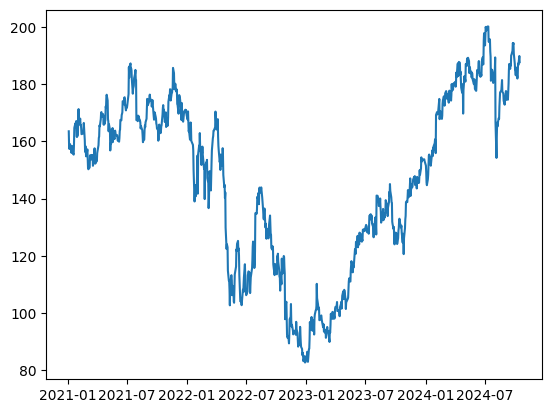

In [ ]:
plt.plot(p['Open']['AMZN'])

## VISUALIZING THE DATA

The variation of opening prices of 2 companies(Amazon and Apple) have been plotted below.

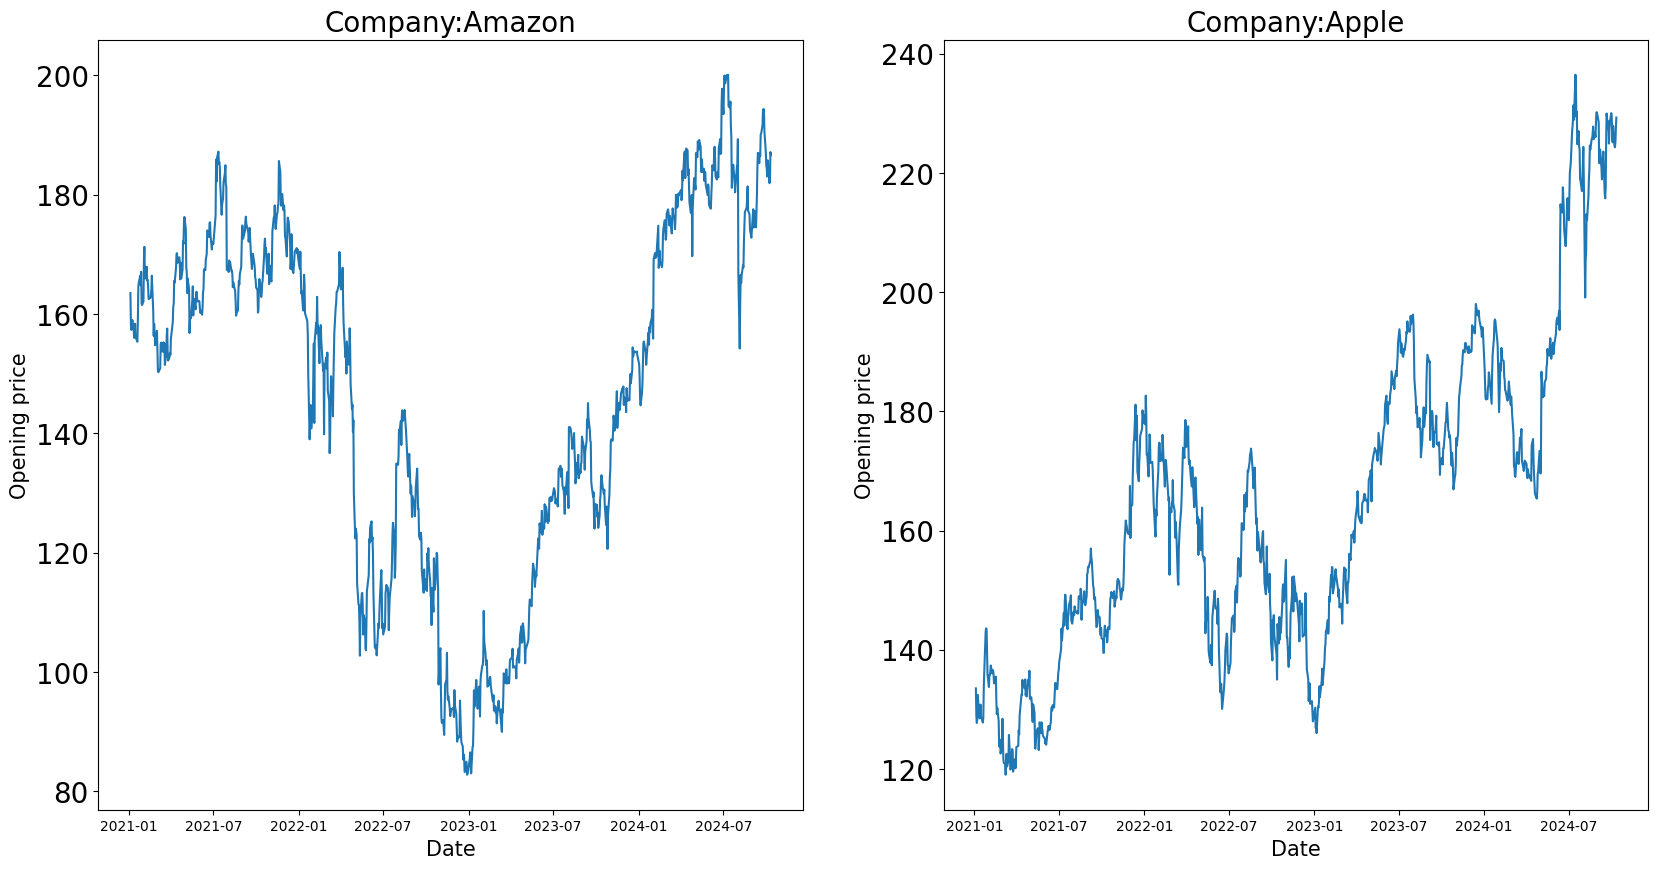

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(p['Open']['AMZN'])
plt.subplot(1,2,2)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(p['Open']['AAPL'])


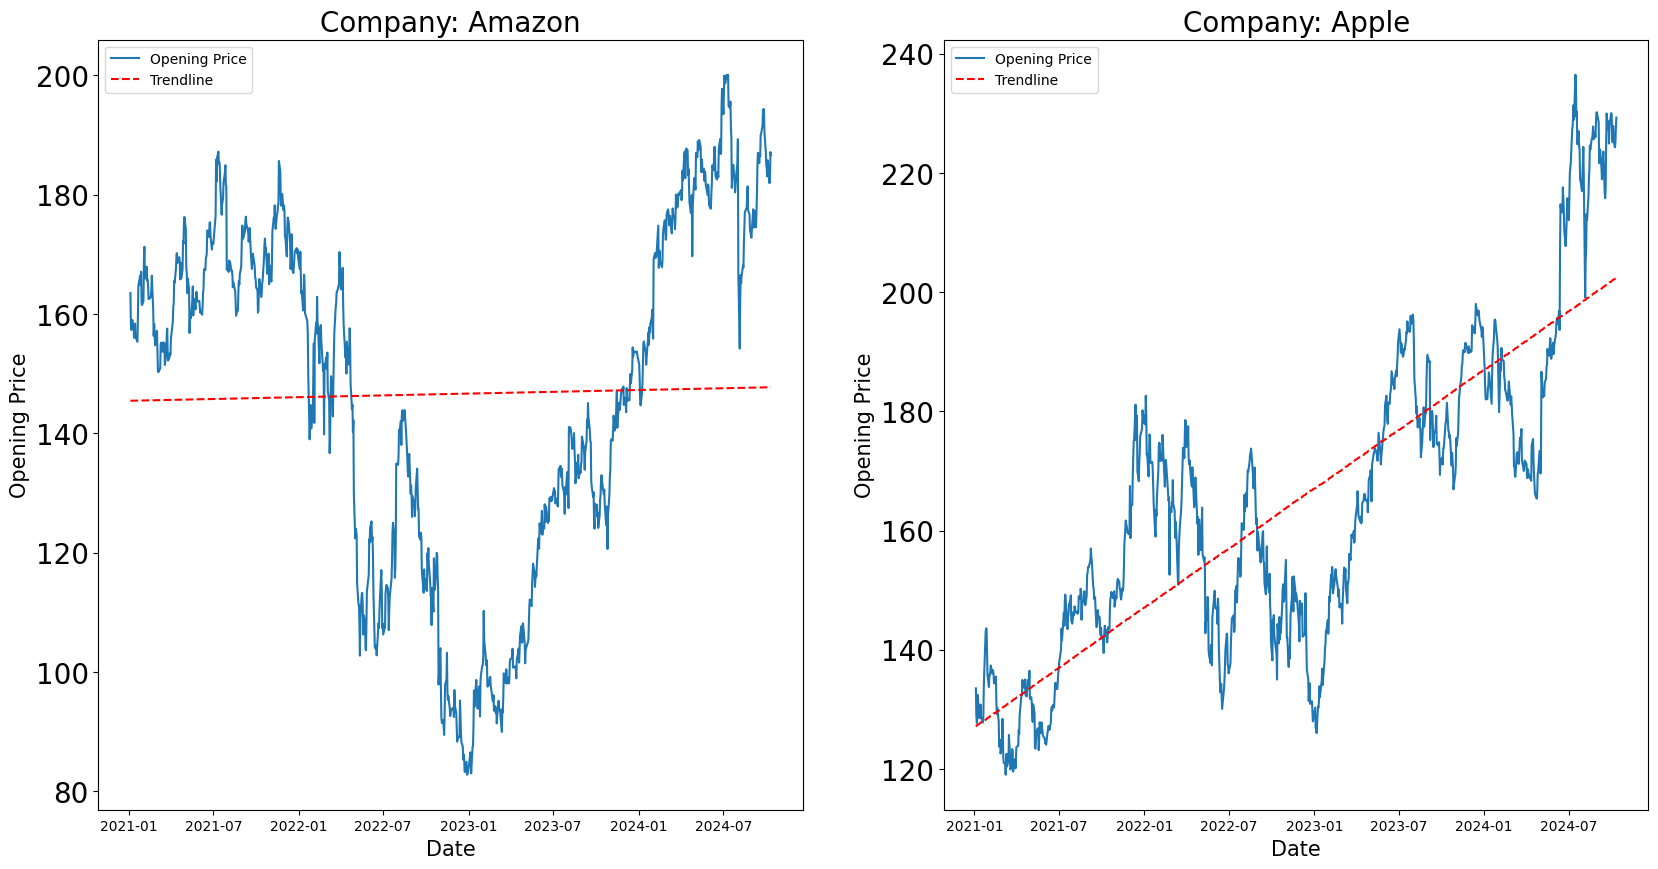

In [ ]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Define the data (assuming 'p' is your DataFrame and 'Date' is the index)
dates_amzn = np.arange(len(p['Open']['AMZN']))
dates_aapl = np.arange(len(p['Open']['AAPL']))

# Calculate the trendline for Amazon
slope_amzn, intercept_amzn, _, _, _ = linregress(dates_amzn, p['Open']['AMZN'])
trendline_amzn = slope_amzn * dates_amzn + intercept_amzn

# Calculate the trendline for Apple
slope_aapl, intercept_aapl, _, _, _ = linregress(dates_aapl, p['Open']['AAPL'])
trendline_aapl = slope_aapl * dates_aapl + intercept_aapl

# Plotting
plt.figure(figsize=(20, 10))

# Amazon plot with trendline
plt.subplot(1, 2, 1)
plt.title('Company: Amazon', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Opening Price', fontsize=15)
plt.plot(p['Open']['AMZN'], label="Opening Price")
plt.plot(p['Open']['AMZN'].index, trendline_amzn, color='red', linestyle='--', label="Trendline")
plt.legend()

# Apple plot with trendline
plt.subplot(1, 2, 2)
plt.title('Company: Apple', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Opening Price', fontsize=15)
plt.plot(p['Open']['AAPL'], label="Opening Price")
plt.plot(p['Open']['AAPL'].index, trendline_aapl, color='red', linestyle='--', label="Trendline")
plt.legend()

plt.show()


Apple has better growth than Amazon in the given time period.
Let us plot the opening and closing prices of Amazon in the time period from ‘2015–01–02’ to ‘2015–01–23’.


In [ ]:
sum_of_movement

array([138.18983459, -44.35539246,  55.71974945, -24.50001526,
         2.0500145 ,   6.340065  ,   0.9499855 ,  76.32735443,
         6.53004551,   0.22006989,  99.92798615, -14.28000069,
        23.779953  ,  -1.41999435, 114.33016968, 111.36068726,
        35.32972717,  41.04011536, 155.65039062, -28.04008484,
        -4.37802792, -20.85993958,  -0.19009399,   5.24998856,
       -31.58997822,  64.29988098])

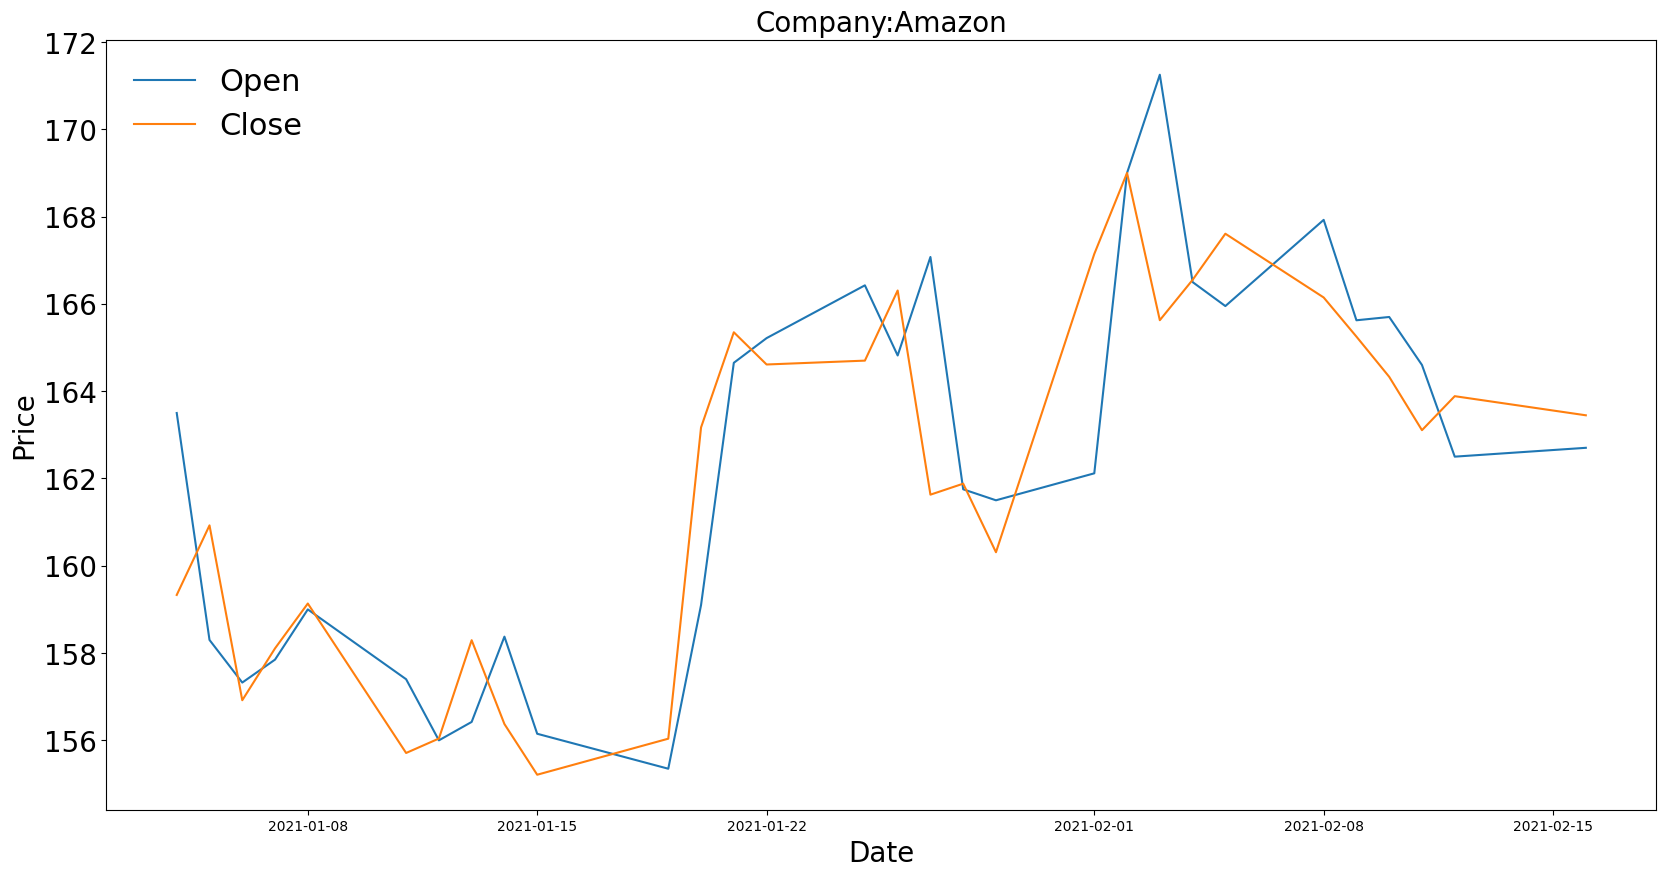

In [ ]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(p.iloc[0:30]['Open']['AMZN'],label = 'Open') # Opening prices of first 30 days are plotted against date
plt.plot(p.iloc[0:30]['Close']['AMZN'],label = 'Close') # Closing prices of first 30 days are plotted against date
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22}) # Properties of legend box

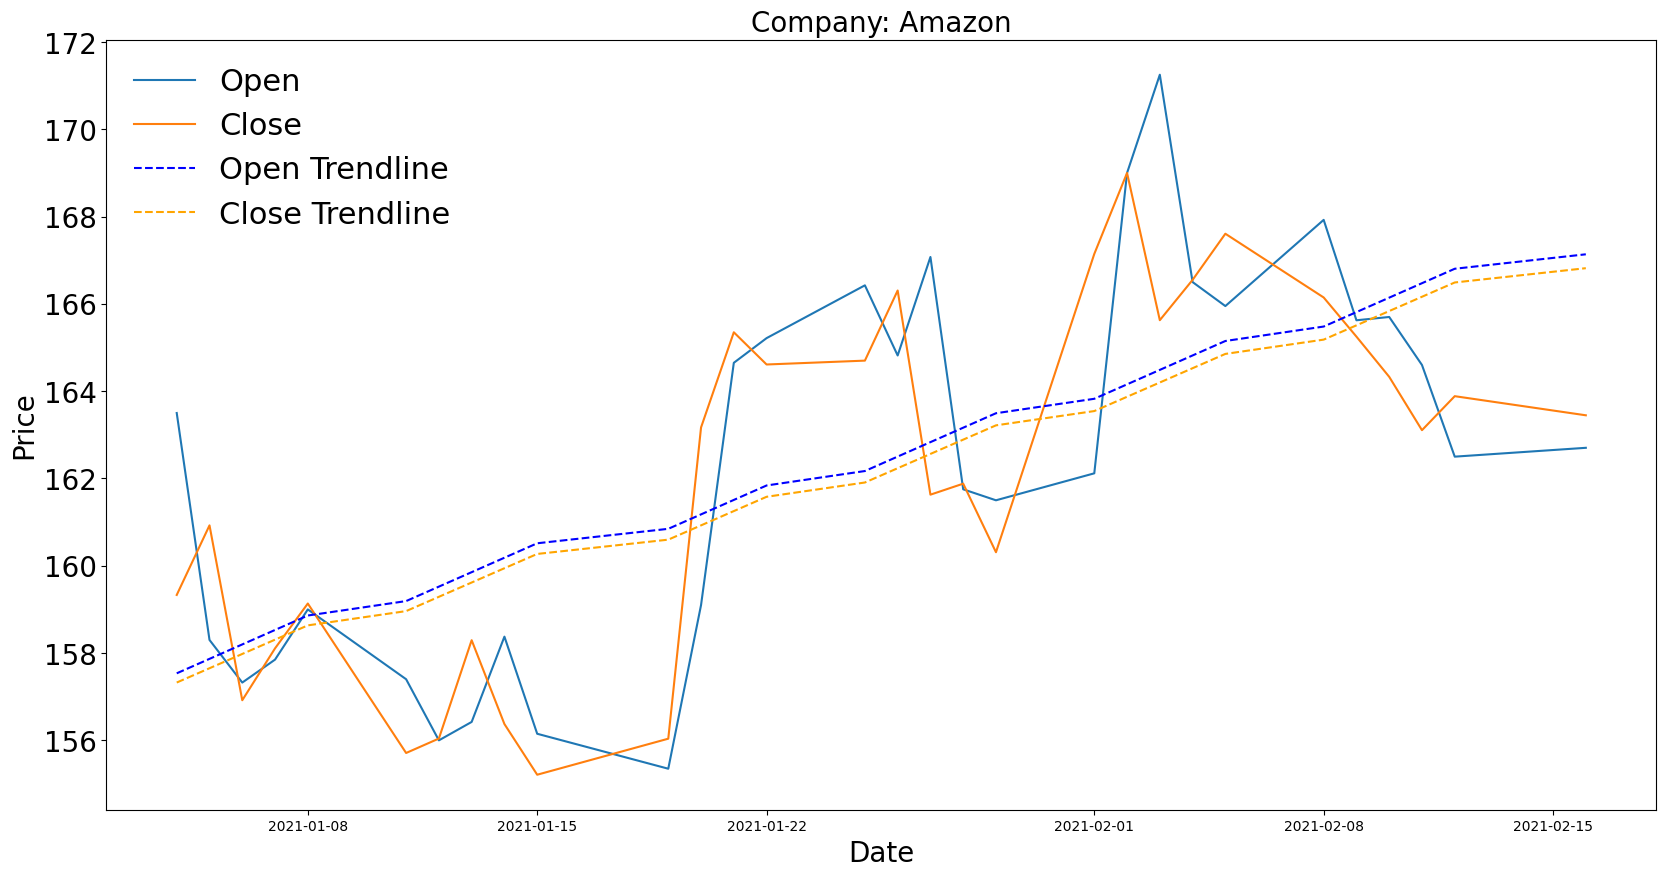

In [ ]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))  # Adjusting figure size
plt.title('Company: Amazon', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Price', fontsize=20)

# Plotting the opening and closing prices for the first 30 days
dates = np.arange(30)  # 0 to 29 (representing the first 30 days)
open_prices = p.iloc[0:30]['Open']['AMZN']
close_prices = p.iloc[0:30]['Close']['AMZN']

# Plotting opening and closing prices
plt.plot(open_prices, label='Open')
plt.plot(close_prices, label='Close')

# Adding trendline for opening prices
slope_open, intercept_open, _, _, _ = linregress(dates, open_prices)
trendline_open = slope_open * dates + intercept_open
plt.plot(open_prices.index, trendline_open, color='blue', linestyle='--', label='Open Trendline')

# Adding trendline for closing prices
slope_close, intercept_close, _, _, _ = linregress(dates, close_prices)
trendline_close = slope_close * dates + intercept_close
plt.plot(close_prices.index, trendline_close, color='orange', linestyle='--', label='Close Trendline')

# Adding legend
plt.legend(loc='upper left', frameon=False, framealpha=1, prop={'size': 22})

plt.show()


There is an overall increase in ‘Open’ and ‘Close’ prices over the 30 day time period which shows the company in a positive light.

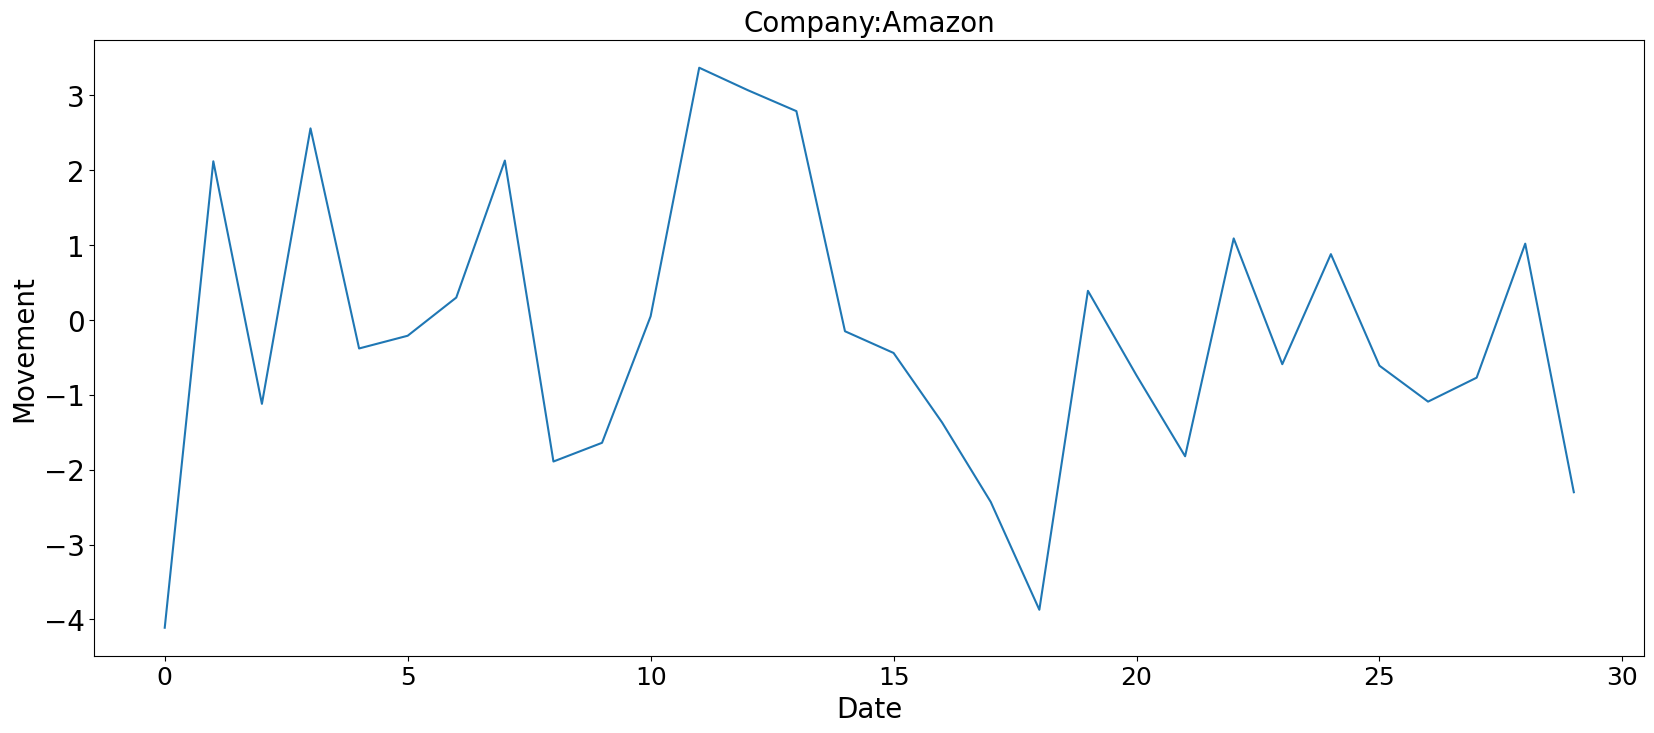

In [ ]:
plt.figure(figsize = (20,8))
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0][0:30])


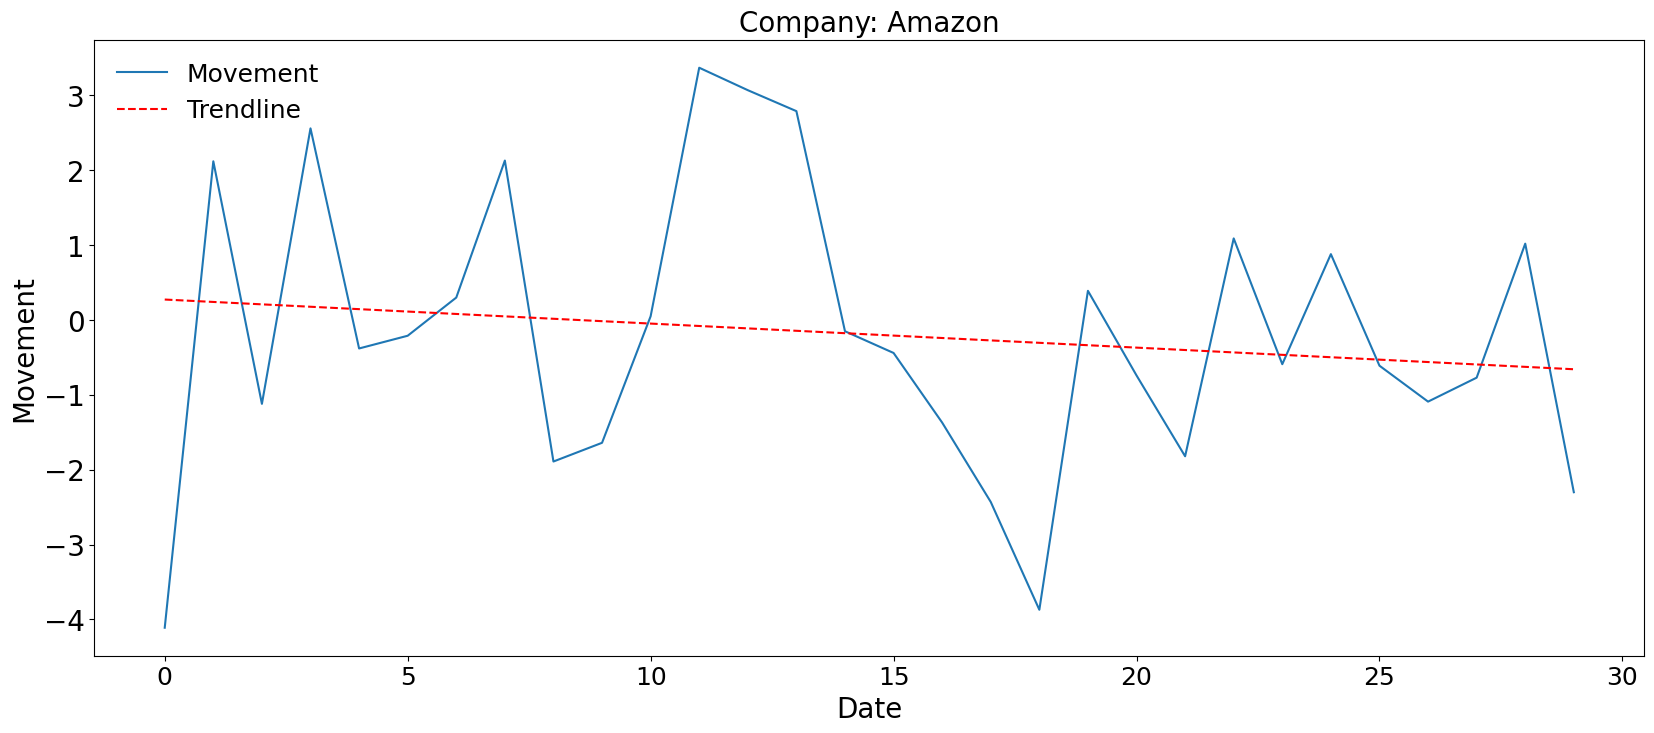

In [ ]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Setting up the figure
plt.figure(figsize=(20, 8))
plt.title('Company: Amazon', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)

# Plotting the movement data for the first 30 days
movement_data = movements[0][0:30]
plt.plot(movement_data, label='Movement')

# Adding a trendline
dates = np.arange(30)  # 0 to 29 (representing the first 30 days)
slope, intercept, _, _, _ = linregress(dates, movement_data)
trendline = slope * dates + intercept
plt.plot(trendline, color='red', linestyle='--', label='Trendline')

# Adding legend
plt.legend(loc='upper left', frameon=False, prop={'size': 18})

plt.show()


‘Movement’ as defined earlier is difference of closing and opening prices of a particular day. The variation of ‘movement’ of amazon in the time period is plotted below.

Positive ‘movement’ is desirable which suggests the price has increased during the day


Another important parameter is ‘Volume’.

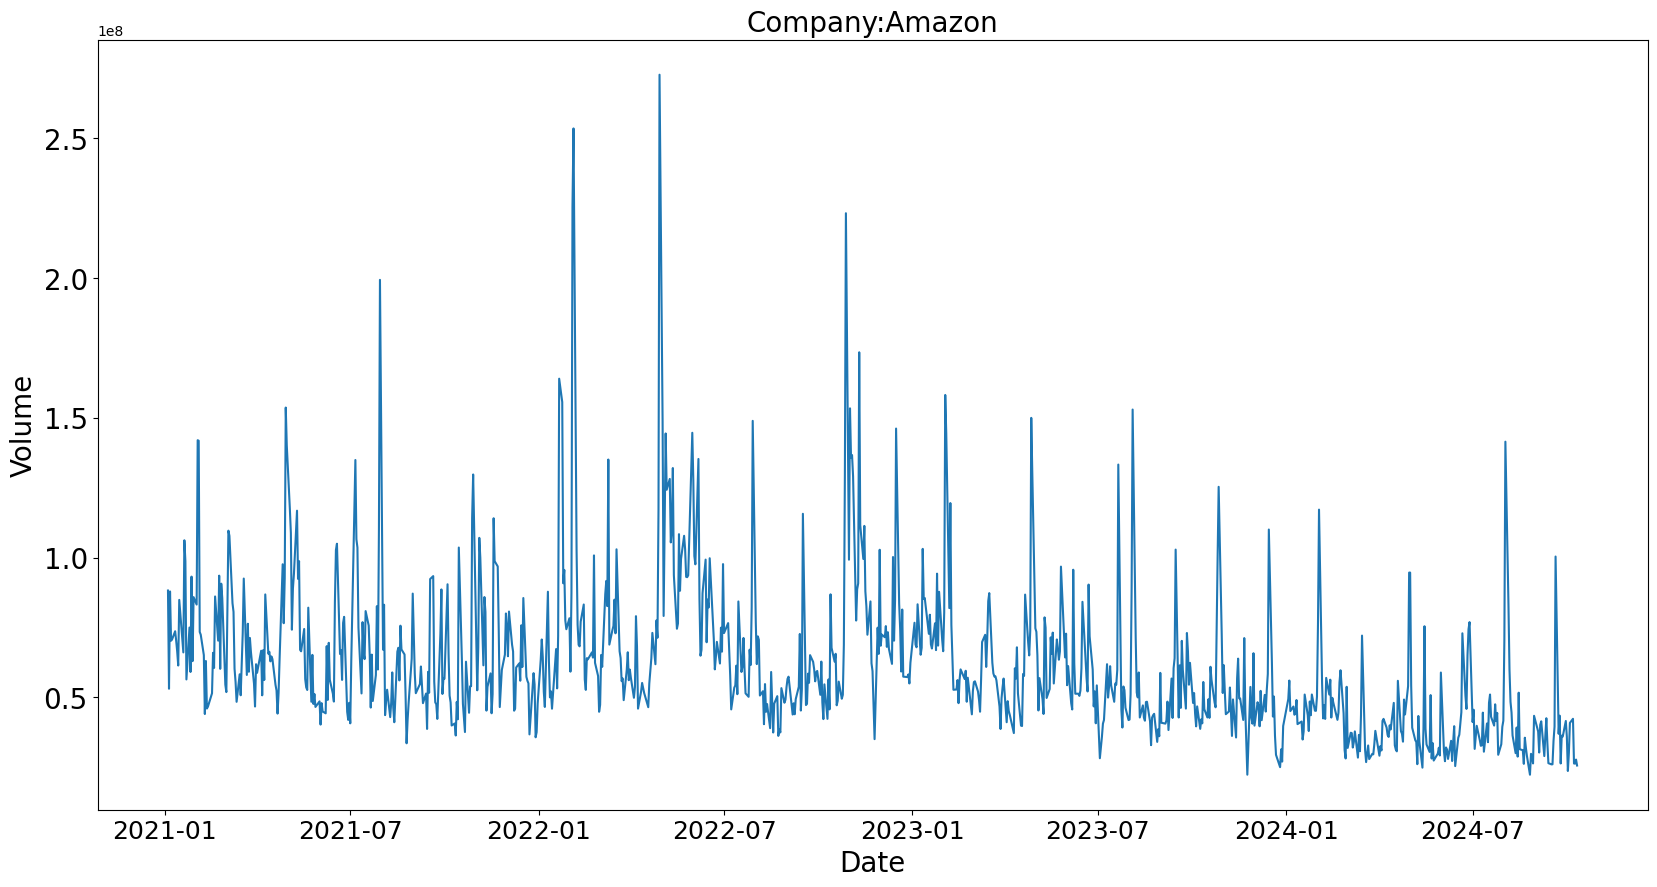

In [ ]:
plt.figure(figsize = (20,10))
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Volume',fontsize = 20)
plt.plot(p['Volume']['AMZN'],label = 'Open')


The peaks suggest there are high volumes of stocks traded on certain days. This may be due to restructuring of company’s management, change of ownership, yearly announcements, new ventures and other factors which affect the image of company in the minds of market participants.



**CANDLESTICK CHART**

The candlestick chart for the first 60 days of Amazon has been plotted below.

Candlestick pattern is an important tool of technical analysis of stocks to predict particular market movements. A green candlestick means that the opening price on that day was lower than the closing price that day (i.e. the price moved up during the day); a red candlestick means that the opening price was higher than the closing price that day (i.e. the price moved down during the day).

In [ ]:
 fig = go.Figure(data=[go.Candlestick(x=p.index,
 open=p.iloc[0:60]['Open']['AMZN'],
 high=p.iloc[0:60]['High']['AMZN'],
 low=p.iloc[0:60]['Low']['AMZN'],
 close=p.iloc[0:60]['Close']['AMZN'])])
 fig.show()


# NEED FOR NORMALIZATION

Let us plot the variation of ‘movement’ of Amazon and Apple.
Stock prices of Amazon and Apple have different scales. Thus x units of change in stock price of Amazon is not the same as x units of change in stock price of Apple. Some companies are worth a lot more than other companies. Hence the data has to be normalized.
The goal of Normalization is to change the value of numeric columns in the dataset to a common scale without distorting differences in the range of values. It is required only when features have different ranges like in the present scenario.
‘norm_movements’ is defined as normalized version of ‘movements’. The Normalizer() rescales each row of ‘movements’ independently.First remove the nan or null values


In [ ]:
print(movements)
print(movements.shape)


[[-4.11000061  2.11999512 -1.12000275 ...  1.47000122  4.30999756
   1.25999451]
 [-4.16850281  2.625      -0.40499878 ...  0.80000305  2.34999084
  -0.48001099]
 [-3.26000214  0.40999603  2.05999756 ... -2.14001465  2.61001587
  -0.45999146]
 ...
 [-1.29999924  1.16999817 -0.06000137 ... -5.68000793  3.83000183
   3.20001221]
 [ 1.23000336 -0.34000015  0.81999969 ...  0.26000023 -0.13000011
   0.13000011]
 [ 0.04999924  1.65999985  0.20000076 ... -1.83999634  1.18999481
  -0.02000427]]
(26, 949)


In [ ]:
new_movements = movements[~np.isnan(movements)]
print(new_movements.shape)
new_movements

(24674,)


array([-4.11000061,  2.11999512, -1.12000275, ..., -1.83999634,
        1.18999481, -0.02000427])

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(new_movements.reshape(-1,1))
# Fit and transform

-1.0
1.0
0.02938315635892032


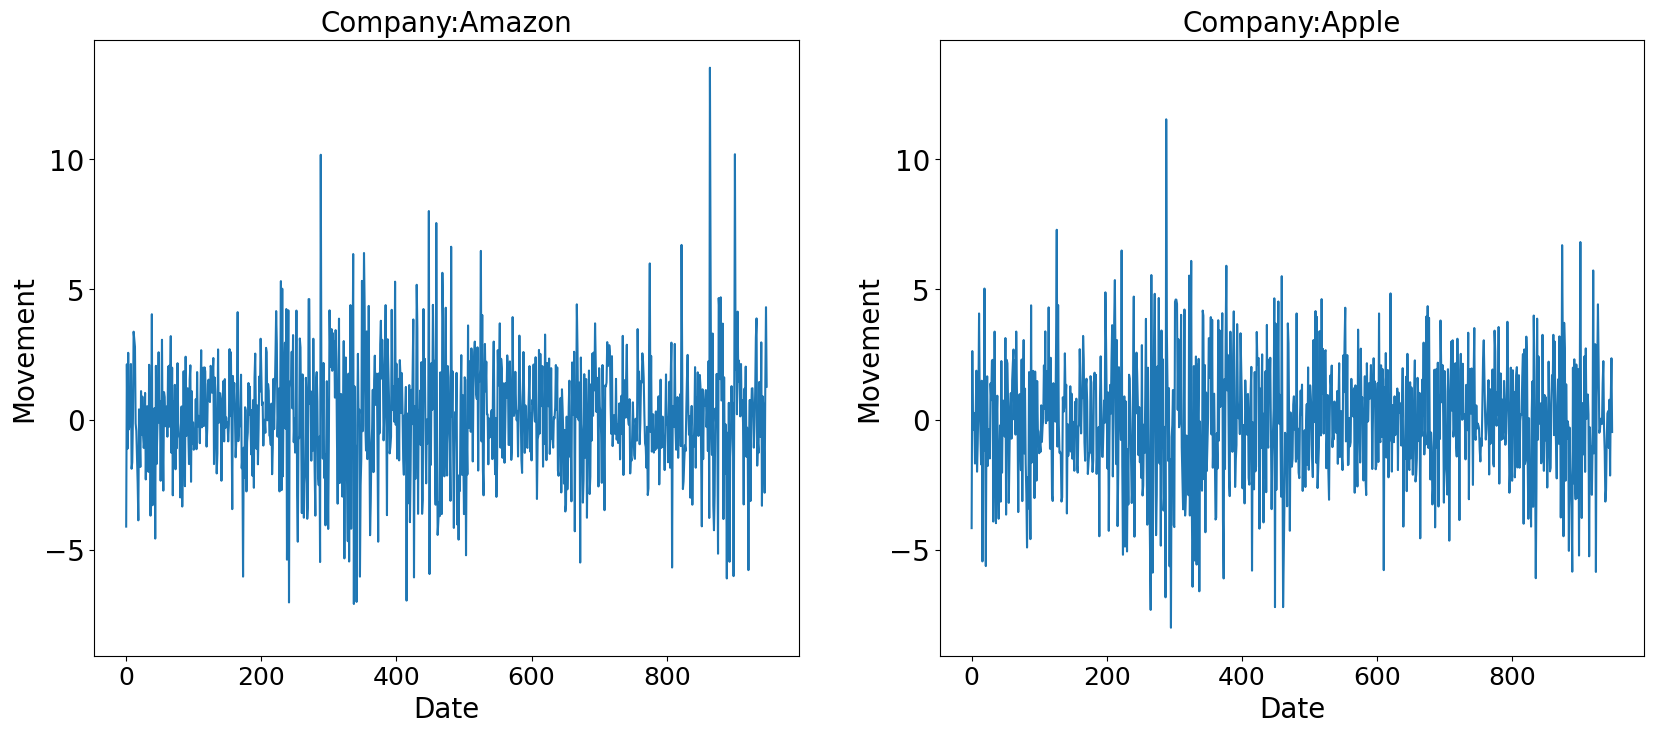

In [ ]:
# The minimum, maximum and mean value of ‘norm_movements’ is printed.
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())
plt.figure(figsize = (20,8))
ax1 = plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0])
plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[1])

In [ ]:
movements

array([[-4.11000061,  2.11999512, -1.12000275, ...,  1.47000122,
         4.30999756,  1.25999451],
       [-4.16850281,  2.625     , -0.40499878, ...,  0.80000305,
         2.34999084, -0.48001099],
       [-3.26000214,  0.40999603,  2.05999756, ..., -2.14001465,
         2.61001587, -0.45999146],
       ...,
       [-1.29999924,  1.16999817, -0.06000137, ..., -5.68000793,
         3.83000183,  3.20001221],
       [ 1.23000336, -0.34000015,  0.81999969, ...,  0.26000023,
        -0.13000011,  0.13000011],
       [ 0.04999924,  1.65999985,  0.20000076, ..., -1.83999634,
         1.18999481, -0.02000427]])

In [ ]:
movements.shape

(26, 949)

In [ ]:
new_movements

array([-4.11000061,  2.11999512, -1.12000275, ..., -1.83999634,
        1.18999481, -0.02000427])

In [ ]:
new_movements.shape

(24674,)

# ADDITIONAL KNOWLEDGE - CLUSTERING

Material to refer
* What is clustering?
https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/


## Apply a simple K-Means Clustering

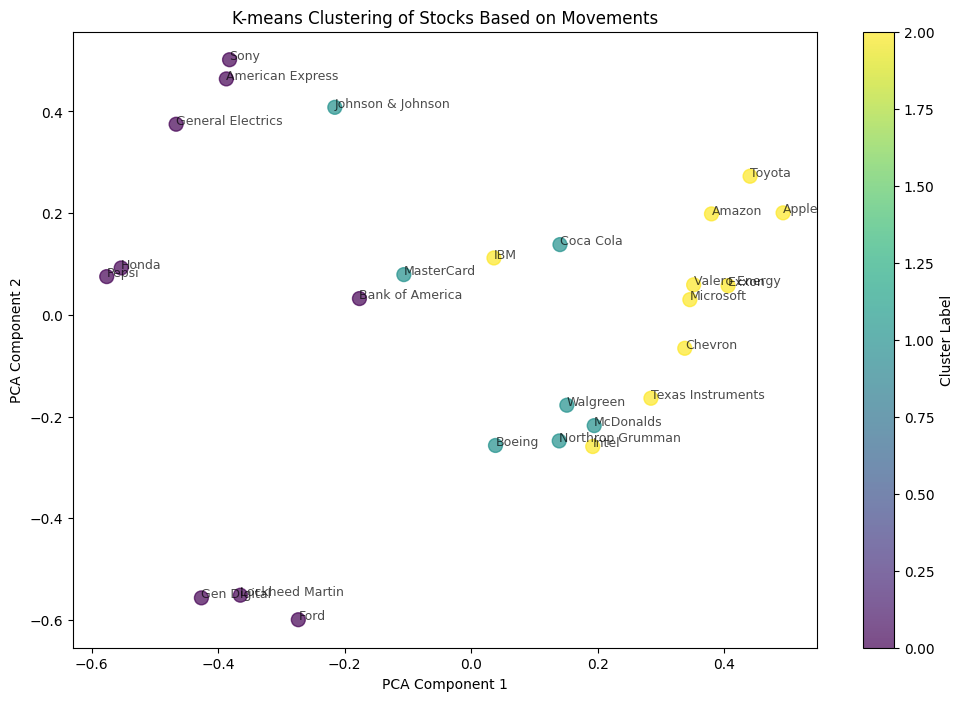

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

stock_names = list(companies_dict.keys())


# Remove NaN values if present
movements = movements[~np.isnan(movements).any(axis=1)]

# Normalize the data to bring all values to a common scale
normalizer = Normalizer()
norm_movements = normalizer.fit_transform(movements)

# Apply K-means clustering
n_clusters = 3  # Adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(norm_movements)

# Get the cluster labels for each stock
labels = kmeans.labels_

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(norm_movements)

# Plotting the clusters with data point labels
plt.figure(figsize=(12, 8))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=100, alpha=0.7)
plt.title("K-means Clustering of Stocks Based on Movements")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster Label')

# Annotate each point with the corresponding stock name
for i, stock_name in enumerate(stock_names):
    plt.annotate(stock_name, (reduced_data[i, 0], reduced_data[i, 1]), fontsize=9, alpha=0.7)

plt.show()
